# Dataset 4 - Boston

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import ABC_train_test
import bostonDataset
import baselineModels
import network
import statsModel
import performanceMetrics
import dataset
import sanityChecks
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Parameters

General Parameters 

1. Number of Samples
2. Number of features 

ABC-Generator parameters are as mentioned below: 
1. mean : 1 ($\beta \sim N(\beta^{*},\sigma)$ where $\beta^{*}$ are coefficients of statistical model) or 1 ($\beta \sim N(0,\sigma)$
2. std : $\sigma = 1, 0.1 , 0.01$ (standard deviation)

In [3]:
n_features = 13
n_samples= 506
n_target = 1 
 
#ABC Generator Parameters
mean = 1 
variance = 0.01

#Hyper-parameters 
n_epochs = 100

## Dataset

In [4]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              96.85
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                   1.94e-113
Time:                        20:03:26   Log-Likelihood:                         -281.70
No. Observations:                 404   AIC:                                      589.4
Df Residuals:                     391   BIC:                                      641.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

No handles with labels found to put in legend.


 x1    -0.097217
x2     0.087642
x3     0.054597
x4     0.055476
x5    -0.161182
x6     0.351300
x7     0.045059
x8    -0.250822
x9     0.248193
x10   -0.230780
x11   -0.209308
x12    0.083692
x13   -0.451069
dtype: float64


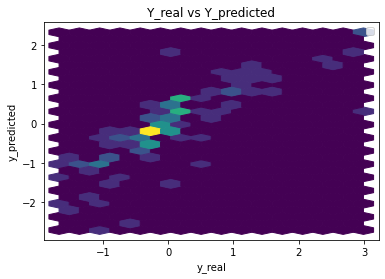

Performance Metrics
Mean Squared Error: 0.3881187592374833
Mean Absolute Error: 0.40791211285216555
Manhattan distance: 41.6070355109209
Euclidean distance: 6.291908569124578


In [6]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

## Random Forest

In [7]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)

Mean Squared error 0.16948640693831615


## Catboost

In [8]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)

Learning rate set to 0.03548
0:	learn: 0.9849444	total: 166ms	remaining: 2m 45s
1:	learn: 0.9635567	total: 168ms	remaining: 1m 23s
2:	learn: 0.9407523	total: 170ms	remaining: 56.5s
3:	learn: 0.9235553	total: 172ms	remaining: 42.9s
4:	learn: 0.9058686	total: 175ms	remaining: 34.7s
5:	learn: 0.8881565	total: 178ms	remaining: 29.4s
6:	learn: 0.8703384	total: 179ms	remaining: 25.5s
7:	learn: 0.8545388	total: 181ms	remaining: 22.5s
8:	learn: 0.8384932	total: 183ms	remaining: 20.1s
9:	learn: 0.8216191	total: 185ms	remaining: 18.3s
10:	learn: 0.8054818	total: 186ms	remaining: 16.8s
11:	learn: 0.7894507	total: 188ms	remaining: 15.5s
12:	learn: 0.7741485	total: 191ms	remaining: 14.5s
13:	learn: 0.7589497	total: 193ms	remaining: 13.6s
14:	learn: 0.7460905	total: 195ms	remaining: 12.8s
15:	learn: 0.7328624	total: 196ms	remaining: 12.1s
16:	learn: 0.7207592	total: 198ms	remaining: 11.5s
17:	learn: 0.7080816	total: 200ms	remaining: 10.9s
18:	learn: 0.6953561	total: 202ms	remaining: 10.5s
19:	learn:

191:	learn: 0.2180759	total: 680ms	remaining: 2.86s
192:	learn: 0.2173347	total: 683ms	remaining: 2.86s
193:	learn: 0.2168321	total: 686ms	remaining: 2.85s
194:	learn: 0.2165319	total: 689ms	remaining: 2.84s
195:	learn: 0.2157324	total: 692ms	remaining: 2.84s
196:	learn: 0.2149485	total: 695ms	remaining: 2.83s
197:	learn: 0.2143500	total: 710ms	remaining: 2.88s
198:	learn: 0.2138643	total: 713ms	remaining: 2.87s
199:	learn: 0.2132433	total: 716ms	remaining: 2.86s
200:	learn: 0.2125826	total: 719ms	remaining: 2.86s
201:	learn: 0.2119210	total: 722ms	remaining: 2.85s
202:	learn: 0.2114839	total: 725ms	remaining: 2.85s
203:	learn: 0.2110886	total: 728ms	remaining: 2.84s
204:	learn: 0.2102272	total: 730ms	remaining: 2.83s
205:	learn: 0.2098282	total: 733ms	remaining: 2.83s
206:	learn: 0.2090547	total: 736ms	remaining: 2.82s
207:	learn: 0.2087046	total: 739ms	remaining: 2.81s
208:	learn: 0.2080641	total: 742ms	remaining: 2.81s
209:	learn: 0.2073125	total: 744ms	remaining: 2.8s
210:	learn: 0

366:	learn: 0.1503211	total: 1.19s	remaining: 2.05s
367:	learn: 0.1499758	total: 1.19s	remaining: 2.04s
368:	learn: 0.1497783	total: 1.19s	remaining: 2.04s
369:	learn: 0.1495468	total: 1.2s	remaining: 2.04s
370:	learn: 0.1491139	total: 1.2s	remaining: 2.03s
371:	learn: 0.1487173	total: 1.2s	remaining: 2.03s
372:	learn: 0.1486195	total: 1.21s	remaining: 2.03s
373:	learn: 0.1482381	total: 1.21s	remaining: 2.02s
374:	learn: 0.1480656	total: 1.21s	remaining: 2.02s
375:	learn: 0.1477865	total: 1.21s	remaining: 2.01s
376:	learn: 0.1474213	total: 1.22s	remaining: 2.01s
377:	learn: 0.1471990	total: 1.22s	remaining: 2.01s
378:	learn: 0.1470590	total: 1.22s	remaining: 2s
379:	learn: 0.1467613	total: 1.23s	remaining: 2s
380:	learn: 0.1465401	total: 1.23s	remaining: 1.99s
381:	learn: 0.1462519	total: 1.23s	remaining: 1.99s
382:	learn: 0.1461387	total: 1.23s	remaining: 1.99s
383:	learn: 0.1456590	total: 1.24s	remaining: 1.98s
384:	learn: 0.1454417	total: 1.24s	remaining: 1.98s
385:	learn: 0.1454185

547:	learn: 0.1110951	total: 1.7s	remaining: 1.4s
548:	learn: 0.1108943	total: 1.71s	remaining: 1.4s
549:	learn: 0.1105552	total: 1.71s	remaining: 1.4s
550:	learn: 0.1102346	total: 1.71s	remaining: 1.4s
551:	learn: 0.1101702	total: 1.72s	remaining: 1.39s
552:	learn: 0.1099529	total: 1.72s	remaining: 1.39s
553:	learn: 0.1097669	total: 1.72s	remaining: 1.39s
554:	learn: 0.1095942	total: 1.73s	remaining: 1.39s
555:	learn: 0.1093615	total: 1.73s	remaining: 1.38s
556:	learn: 0.1093006	total: 1.74s	remaining: 1.38s
557:	learn: 0.1090759	total: 1.74s	remaining: 1.38s
558:	learn: 0.1088849	total: 1.74s	remaining: 1.38s
559:	learn: 0.1087803	total: 1.75s	remaining: 1.37s
560:	learn: 0.1086980	total: 1.75s	remaining: 1.37s
561:	learn: 0.1084192	total: 1.75s	remaining: 1.37s
562:	learn: 0.1082476	total: 1.76s	remaining: 1.36s
563:	learn: 0.1081583	total: 1.76s	remaining: 1.36s
564:	learn: 0.1079530	total: 1.77s	remaining: 1.36s
565:	learn: 0.1076993	total: 1.77s	remaining: 1.36s
566:	learn: 0.107

746:	learn: 0.0824531	total: 2.38s	remaining: 806ms
747:	learn: 0.0823813	total: 2.38s	remaining: 803ms
748:	learn: 0.0822111	total: 2.39s	remaining: 800ms
749:	learn: 0.0820904	total: 2.39s	remaining: 797ms
750:	learn: 0.0820775	total: 2.39s	remaining: 793ms
751:	learn: 0.0819646	total: 2.4s	remaining: 790ms
752:	learn: 0.0819061	total: 2.4s	remaining: 787ms
753:	learn: 0.0817897	total: 2.4s	remaining: 783ms
754:	learn: 0.0816227	total: 2.4s	remaining: 780ms
755:	learn: 0.0814850	total: 2.41s	remaining: 777ms
756:	learn: 0.0813152	total: 2.41s	remaining: 774ms
757:	learn: 0.0811975	total: 2.41s	remaining: 771ms
758:	learn: 0.0811000	total: 2.42s	remaining: 767ms
759:	learn: 0.0809240	total: 2.42s	remaining: 764ms
760:	learn: 0.0807687	total: 2.42s	remaining: 761ms
761:	learn: 0.0806004	total: 2.42s	remaining: 758ms
762:	learn: 0.0804260	total: 2.43s	remaining: 754ms
763:	learn: 0.0803821	total: 2.43s	remaining: 751ms
764:	learn: 0.0802970	total: 2.43s	remaining: 748ms
765:	learn: 0.08

929:	learn: 0.0644343	total: 2.89s	remaining: 217ms
930:	learn: 0.0642591	total: 2.89s	remaining: 214ms
931:	learn: 0.0641774	total: 2.9s	remaining: 211ms
932:	learn: 0.0640792	total: 2.9s	remaining: 208ms
933:	learn: 0.0639281	total: 2.9s	remaining: 205ms
934:	learn: 0.0639068	total: 2.9s	remaining: 202ms
935:	learn: 0.0637726	total: 2.91s	remaining: 199ms
936:	learn: 0.0636352	total: 2.91s	remaining: 196ms
937:	learn: 0.0635865	total: 2.91s	remaining: 193ms
938:	learn: 0.0634604	total: 2.92s	remaining: 190ms
939:	learn: 0.0633184	total: 2.92s	remaining: 187ms
940:	learn: 0.0631925	total: 2.92s	remaining: 183ms
941:	learn: 0.0631341	total: 2.93s	remaining: 180ms
942:	learn: 0.0630558	total: 2.93s	remaining: 177ms
943:	learn: 0.0630154	total: 2.94s	remaining: 174ms
944:	learn: 0.0629119	total: 2.94s	remaining: 171ms
945:	learn: 0.0628771	total: 2.94s	remaining: 168ms
946:	learn: 0.0627443	total: 2.94s	remaining: 165ms
947:	learn: 0.0625991	total: 2.95s	remaining: 162ms
948:	learn: 0.06

## Common Training Parameters (Vanilla NN & GAN & ABC_GAN) 

In [9]:
threshold_mse = mse_cb
batch_size = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Vanilla Neural Network 

In [11]:
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 1.0646983855112833


## GAN Model

**Training GAN for n_epochs number of epochs** 

In [12]:
generator = network.Generator(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.01, betas=(0.5, 0.999))

In [13]:
print(generator)
print(discriminator)

Generator(
  (hidden1): Linear(in_features=14, out_features=100, bias=True)
  (hidden2): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)
Discriminator(
  (hidden1): Linear(in_features=14, out_features=25, bias=True)
  (hidden2): Linear(in_features=25, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


In [14]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,device)

In [15]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)

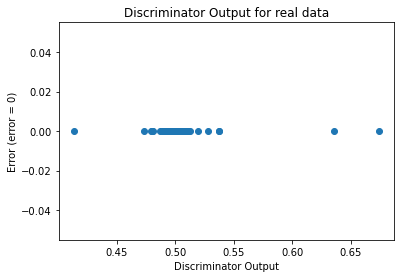

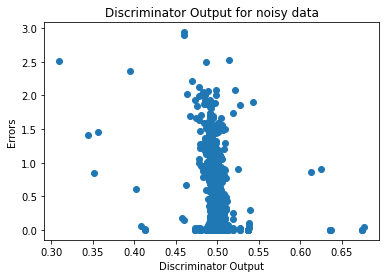

In [16]:
sanityChecks.discProbVsError(real_dataset,discriminator,device)

**Training GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [17]:
generator2 = network.Generator(n_features+1).to(device)
discriminator2 = network.Discriminator(n_features+1).to(device)
criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [18]:
discLossG2,genLossG2 = train_test.training_GAN_2(discriminator2,generator2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,device)

Number of epochs needed 5000


In [19]:
GAN2_metrics=train_test.test_generator_2(generator2,test_data,device)

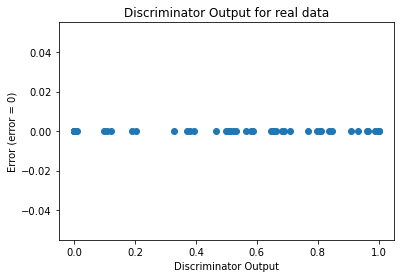

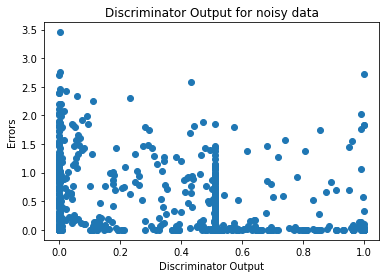

In [20]:
sanityChecks.discProbVsError(real_dataset,discriminator2,device)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [21]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [22]:
discLossA1,genLossA1 = ABC_train_test.training_GAN(disc, gen,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

In [23]:
ABC_GAN1_metrics=ABC_train_test.test_generator(gen,test_data,coeff,mean,variance,device)

#### Sanity Checks 

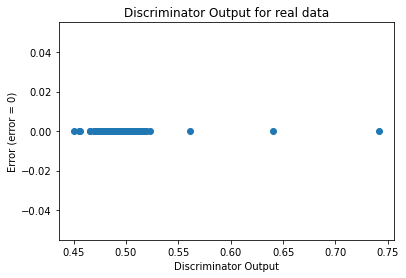

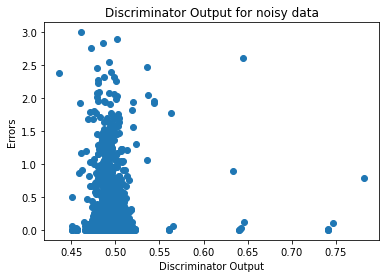

In [24]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [25]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [26]:
discLossA2,genLossA2 = ABC_train_test.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,coeff,mean,variance,device)

Number of epochs 5000


In [27]:
ABC_GAN2_metrics=ABC_train_test.test_generator_2(gen2,test_data,coeff,mean,variance,device)

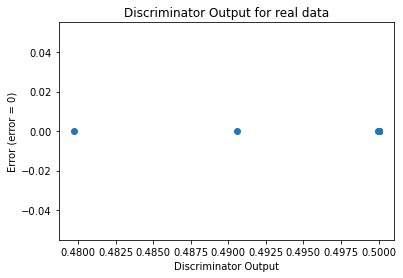

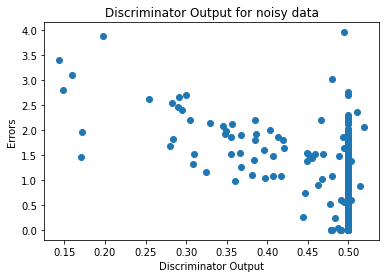

In [28]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# Model Analysis

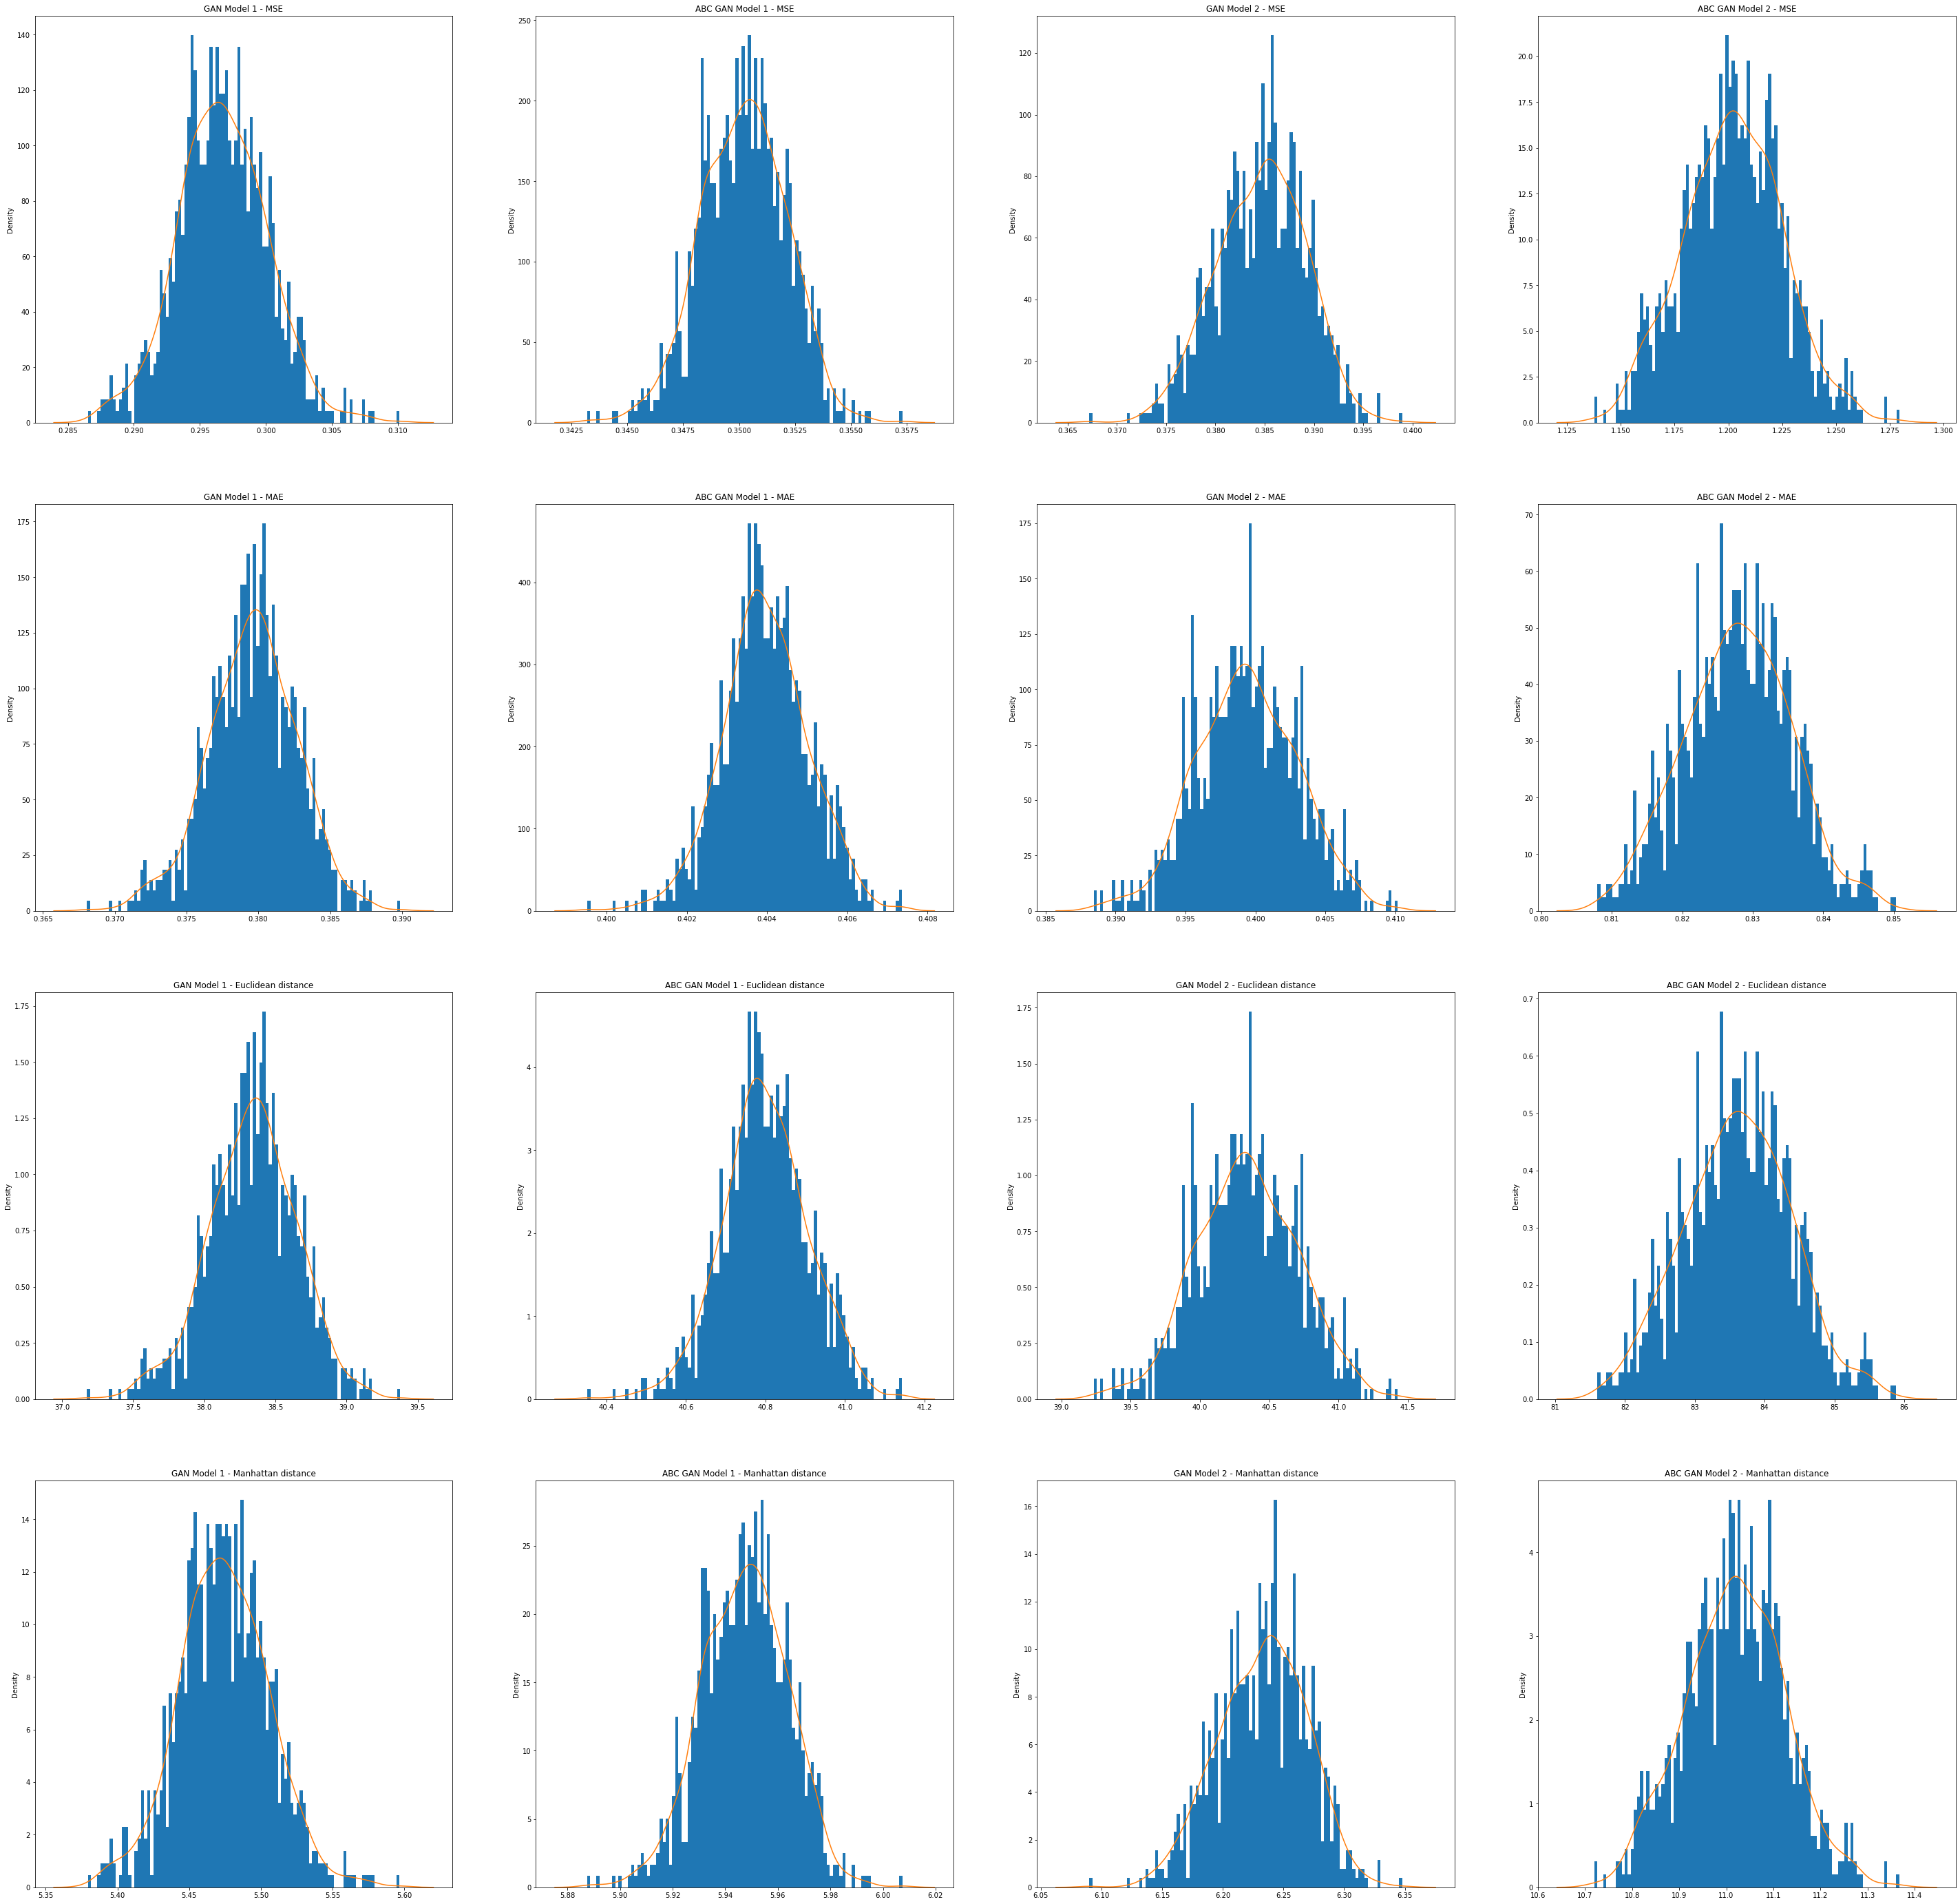

In [29]:
performanceMetrics.modelAnalysis(GAN1_metrics,ABC_GAN1_metrics,GAN2_metrics,ABC_GAN2_metrics)

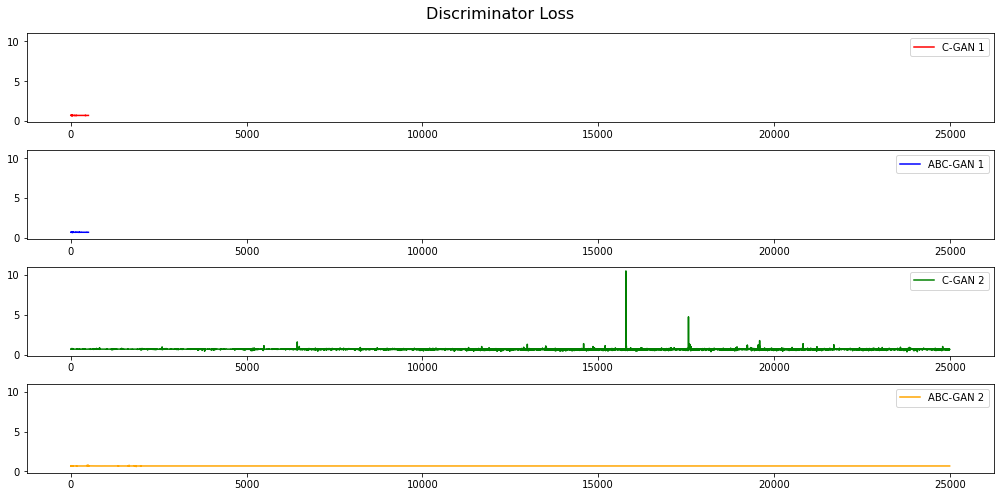

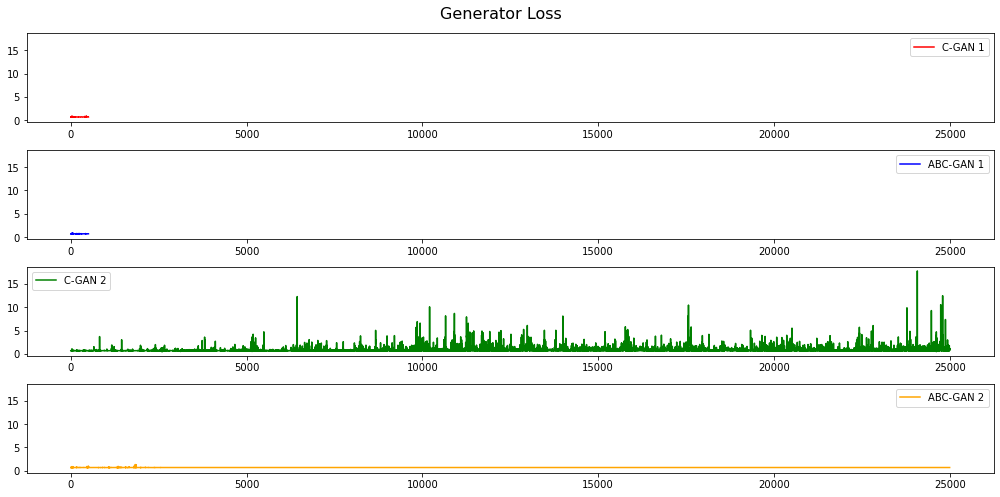

In [30]:
performanceMetrics.plotTrainingLoss(discLossG1,genLossG1,discLossA1,genLossA1,discLossG2,genLossG2,discLossA2,genLossA2)

# ABC - GAN Model with skip connection

In [31]:
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))

In [32]:
discLossA3,genLossA3 = ABC_train_test.training_GAN(disc3, gen3,disc_opt,gen_opt,train_data,batch_size, n_epochs,criterion,coeff,mean,variance,device)

In [33]:
ABC_GAN3_metrics=ABC_train_test.test_generator(gen3,test_data,coeff,mean,variance,device)

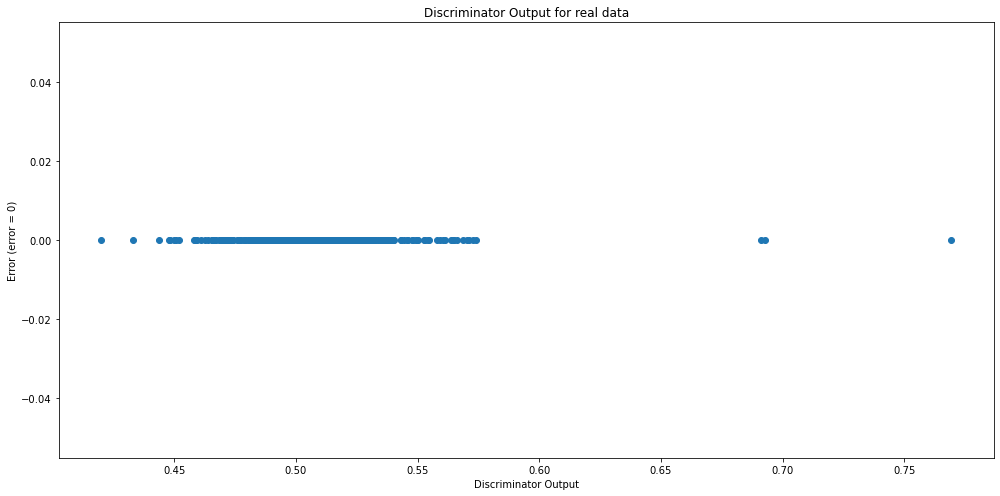

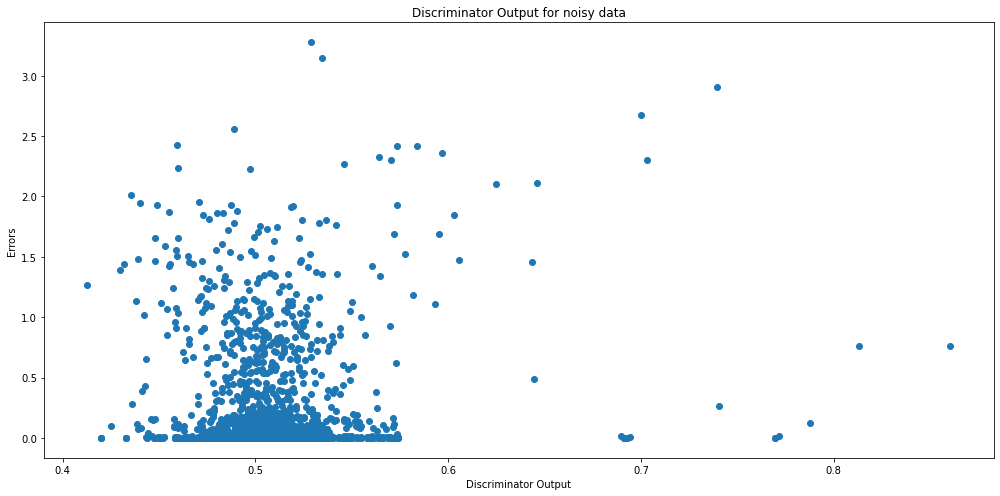

In [34]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [35]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)

Weight of the node at skip connection
Parameter containing:
tensor([[-0.0358]], device='cuda:0', requires_grad=True)


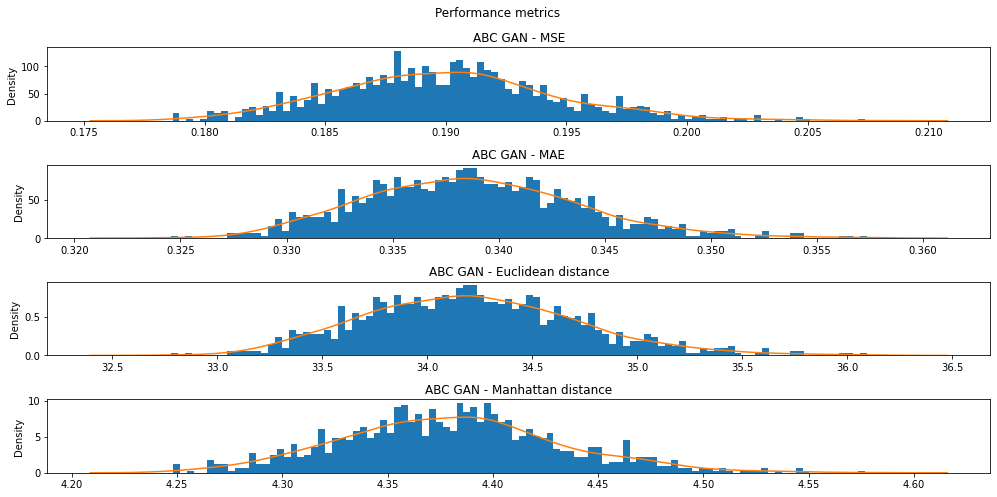

In [36]:
performanceMetrics.modelAnalysis2(ABC_GAN3_metrics)

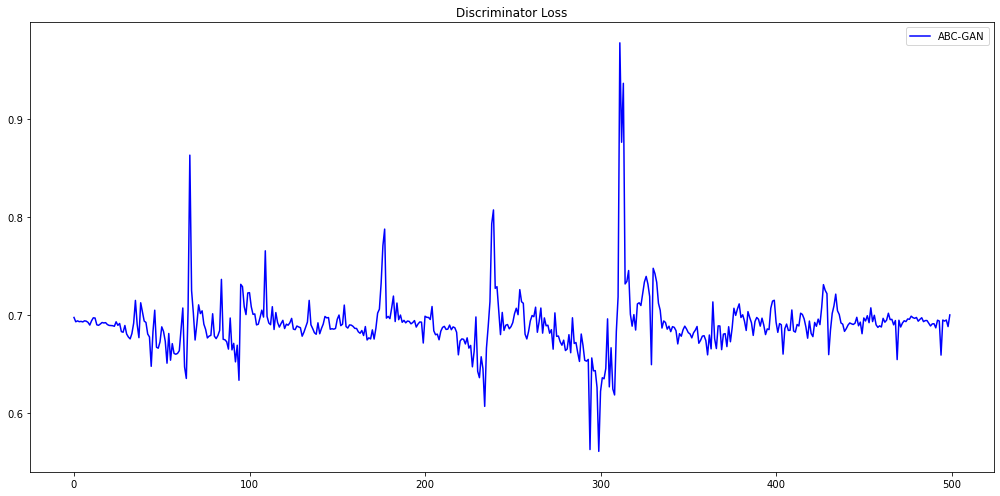

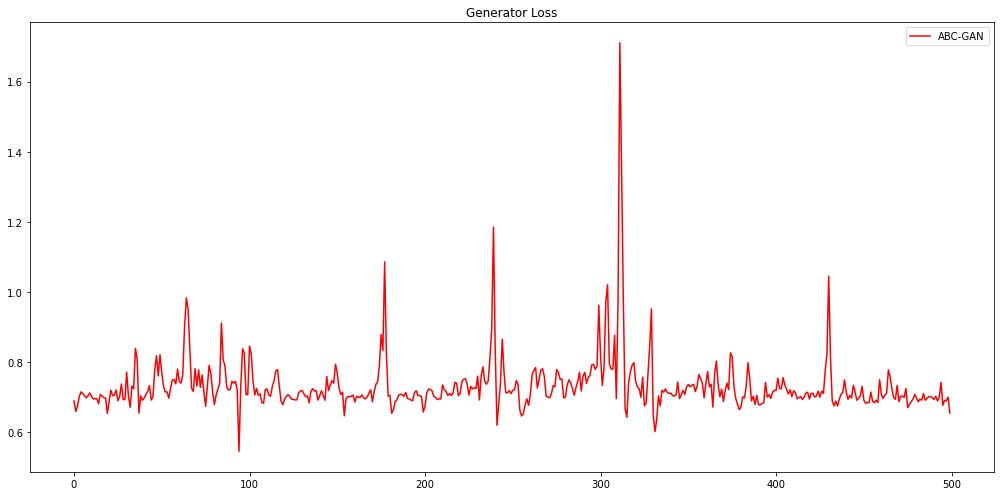

In [37]:
performanceMetrics.plotTrainingLoss2(discLossA3,genLossA3)